Questions to answer

- What coffee title has the most reviews? ✅
- What coffee title has the most rating? ✅
- What is the most popular seller? ✅
- What coffee title has the highest/lowest price? ✅
- What is the sum weight in gramms? ✅
- What coffee title has the highest/lowest weight (gramms)? ✅
- What is the most popular coffee type? ✅
- Most frequent coffee gramms? ✅
- What is the sum weight in gramms? ✅
- Higher weight (gramms) = bigger price? ✅
- Lower weight (gramms) = lower price? ✅

## Key Takeaways

1. Most popular coffee seller is Walmart.
2. Most popular coffee type is medium roast. 
3. More weight (grams) doesn't equal higher price.
    - A lower gram coffee may cost more than a higher gram coffee.
4. Highest coffee weight is 2835 grams (2.8 kg).
5. Folgers classic roast ground coffee has 15k+ reviews.

## Process

In [54]:
%pip install pandas matplotlib seaborn jinja2 google-search-results
%matplotlib inline

In [4]:
import pandas as pd

coffee_df = pd.read_csv('/workspace/serpapi-demo-projects/walmart-coffee-analysis/data/coffee-listings-from-all-walmart-stores.csv')
coffee_df.head()

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8


In [5]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       1400 non-null   object 
 1   coffee_type                 1121 non-null   object 
 2   rating                      1400 non-null   float64
 3   reviews                     1400 non-null   int64  
 4   seller_name                 1400 non-null   object 
 5   thumbnail                   1400 non-null   object 
 6   price                       1400 non-null   float64
 7   weight                      1400 non-null   object 
 8   weight_formatted_to_gramms  1400 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 98.6+ KB


In [6]:
coffee_df.describe()

,rating,reviews,price,weight_formatted_to_gramms
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,3.982643,440.853571,14.041343,621.391786
std,1.518037,879.351997,10.257832,369.564693
min,0.000000,0.000000,0.000000,0.000000
25%,4.300000,16.000000,7.950000,340.200000
50%,4.600000,136.000000,12.735000,567.000000
75%,4.800000,604.500000,16.990000,850.500000
max,5.000000,15148.000000,77.090000,2835.000000


In [7]:
coffee_df.shape

(1400, 9)

Text(0.5, 1.0, 'Correlation between variables')

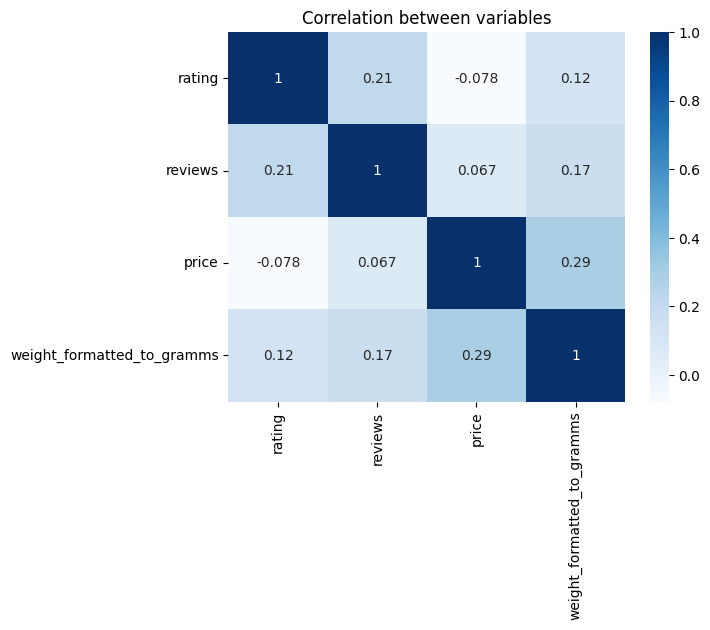

In [8]:
import seaborn as sns
import matplotlib as plt

ax = sns.heatmap(coffee_df.corr(numeric_only=True), annot=True, cmap="Blues")
ax.set_title('Correlation between variables')

What coffee title has the most reviews? ✅

Answer : folgers classic roast ground coffee, medium ro... / 15148 reviews

What coffee title has the most rating? ✅

Answer: community coffee caf special decaf medium-dark roast coffee single-serve cups 36 ct box compatible with keurig 2.0 k-cup brewers / rating of 5 and 108 reviews

In [9]:
coffee_df.query('reviews == reviews.max()')[['title', 'reviews']]

,title,reviews
46,"folgers classic roast ground coffee, medium ro...",15148


In [52]:
coffee_df.query('rating == rating.max()')[['title', 'rating', 'reviews']].sort_values(
    by='reviews', ascending=False
).style.hide(axis='index').background_gradient(cmap='Blues')


title,rating,reviews
community coffee caf special decaf medium-dark roast coffee single-serve cups 36 ct box compatible with keurig 2.0 k-cup brewers,5.000000,108
"cameron's coffee jamaican me crazy ground coffee, light roast, 12 oz",5.000000,29
"caf bustelo ground coffee, dark roast, 6-ounce brick",5.000000,20
"vispak zlatna bosnian coffee, 35.2 oz",5.000000,11
"black rifle ready-to-drink coffee, espresso with cream, 11oz, can",5.000000,8
eldorado espresso brick 9 oz,5.000000,7
"black rifle ready-to-drink coffee, espresso mocha, 11oz, can",5.000000,6
"death wish coffee, organic, fair trade, pumpkin chai ground coffee, 12 oz, bag",5.000000,4
"death wish coffee, organic, fair-trade, espresso roast ground, 14oz, bag",5.000000,4
"kauai coffee na pali coast k-cup coffee pods, dark roast, 24 ct",5.000000,4


What is the most popular seller? ✅
- answer: Walmart

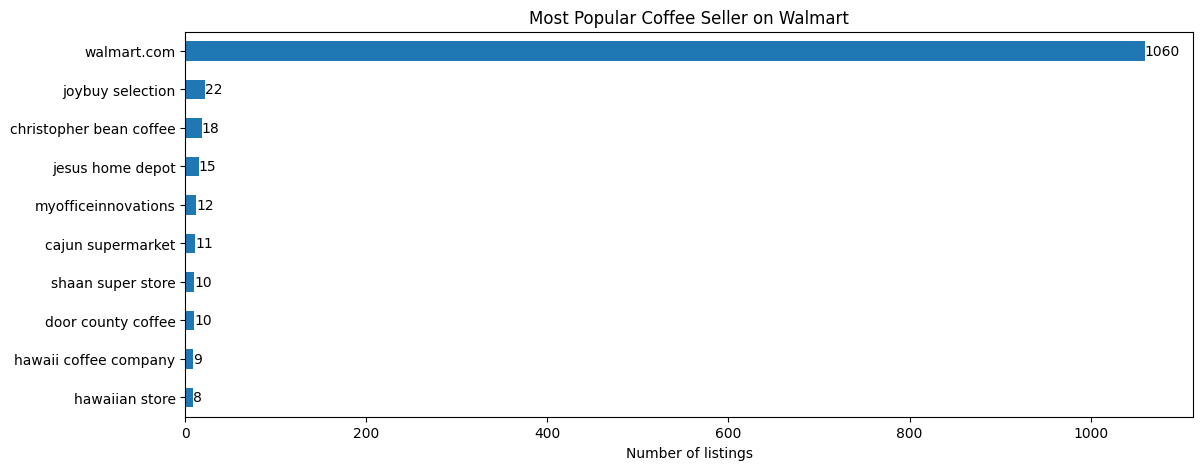

In [55]:
plt.title('Most Popular Coffee Seller on Walmart')

ax = coffee_df['seller_name'].value_counts().head(10).sort_values().plot(kind='barh', figsize=(13,5))
ax.bar_label(ax.containers[0])

plt.xlabel('Number of listings')
plt.show()

What is the sum weight in gramms? ✅
- Answer: 869948.5 grams which is 870 kilograms 🤓

In [12]:
grams = coffee_df['weight_formatted_to_gramms'].sum()
kilorgrams = round(coffee_df['weight_formatted_to_gramms'].sum() / 1000)

print(f'Grams: {grams}\nKilograms: {kilorgrams}')

Grams: 869948.5
Kilograms: 870


What coffee title has the highest/lowest price? ✅

Answer highest: lavazza perfetto single-serve k-cup® pods for keurig brewer, dark roast, 10-ct boxes (pack of 6) / price $77.09

Answer lowest: 
- folgers classic roast instant coffee, single serve packets / price $1
- classic decaf instant coffee crystals packets, 6 count / price $1

Highest price

In [13]:
coffee_df.query('price == price.max()')[['title', 'price']]

,title,price
1275,lavazza perfetto single-serve k-cup® pods for ...,77.09


Lowest price
- folgers classic roast instant coffee, single serve packets / price $1 
- folgers classic decaf instant coffee crystals packets, 6 count / price $1

In [14]:
# condition with .min() won't work: coffee_df.loc[(coffee_df['price'] != 0) & (coffee_df['price'].min()), ['price']]

# != 0 to exclude 0 values
coffee_df.loc[(coffee_df['price'] != 0) & (coffee_df['price'] < 1.1), ['title', 'price']]

,title,price
1109,"folgers classic roast instant coffee, single s...",1.0
1304,folgers classic decaf instant coffee crystals ...,1.0


What coffee title has the highest/lowest weight (gramms)? ✅

Answer highest: 

|Title|Answer|
|-|-|
|victor allen's coffee variety pack, 100 count, single serve coffee pods for keurig k-cup brewers|2835.0 grams|
|eight o'clock the original medium roast k-cup coffee pods, 100 ct|2835.0 grams|
|royal kona coffee for royalty chocolate macadamia nut, 10% kona coffee blend, all purpose grind|2835.0 grams|

Answer lowest:

|Title|Answer|
|-|-|
|great value classic roast ground coffee pods, 0.31 oz, 48 count|8.8 gram|
|great value classic roast ground coffee pods, 0.31 oz, 12 count|8.8 gram|
|great value classic roast ground coffee pods, 0.31 oz, 96 count|8.8 gram|


Highest Weight

In [15]:
coffee_df.query('weight_formatted_to_gramms == weight_formatted_to_gramms.max()')[
    ['title', 'weight_formatted_to_gramms']
]

,title,weight_formatted_to_gramms
334,"victor allen's coffee variety pack, 100 count,...",2835.0
986,eight o'clock the original medium roast k-cup ...,2835.0
987,royal kona coffee for royalty chocolate macada...,2835.0


Lowest Weight

There are 7 indexes with 0.0 values due to not correctly extracted data.

In [16]:
coffee_df.query('weight_formatted_to_gramms == weight_formatted_to_gramms.min()')[
    'weight_formatted_to_gramms'
]

305     0.0
425     0.0
703     0.0
890     0.0
957     0.0
991     0.0
1188    0.0
Name: weight_formatted_to_gramms, dtype: float64

In [17]:
# weight doesn't equal 0
# and 
# weight doesn't higher than 10 grams

coffee_df.loc[
    (coffee_df['weight_formatted_to_gramms'] != 0.0)
    & (coffee_df['weight_formatted_to_gramms'] < 10),
    ['title', 'weight_formatted_to_gramms'],
]

,title,weight_formatted_to_gramms
227,"great value classic roast ground coffee pods, ...",8.8
289,"great value classic roast ground coffee pods, ...",8.8
1317,"great value classic roast ground coffee pods, ...",8.8


What is the most popular coffee type? ✅

Top 3:

1. Medium Roast
2. Dark Roast
3. Arabica

📌Note: There're 125 different types of coffee and some of them could be missing.

Take a look at `COFFEE_TYPES` `list` under `extraction.py`

Split coffee types and extend them to a new list

In [43]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
coffee_types = coffee_df['coffee_type'].fillna(method='ffill') # fill with None

coffee_types_new = []

# split by comma and extend the new list with split values
# https://stackoverflow.com/a/27886807/15164646
for coffee_type in coffee_types:
    coffee_types_new.extend(coffee_type.split(','))

Get the most frequent coffee type

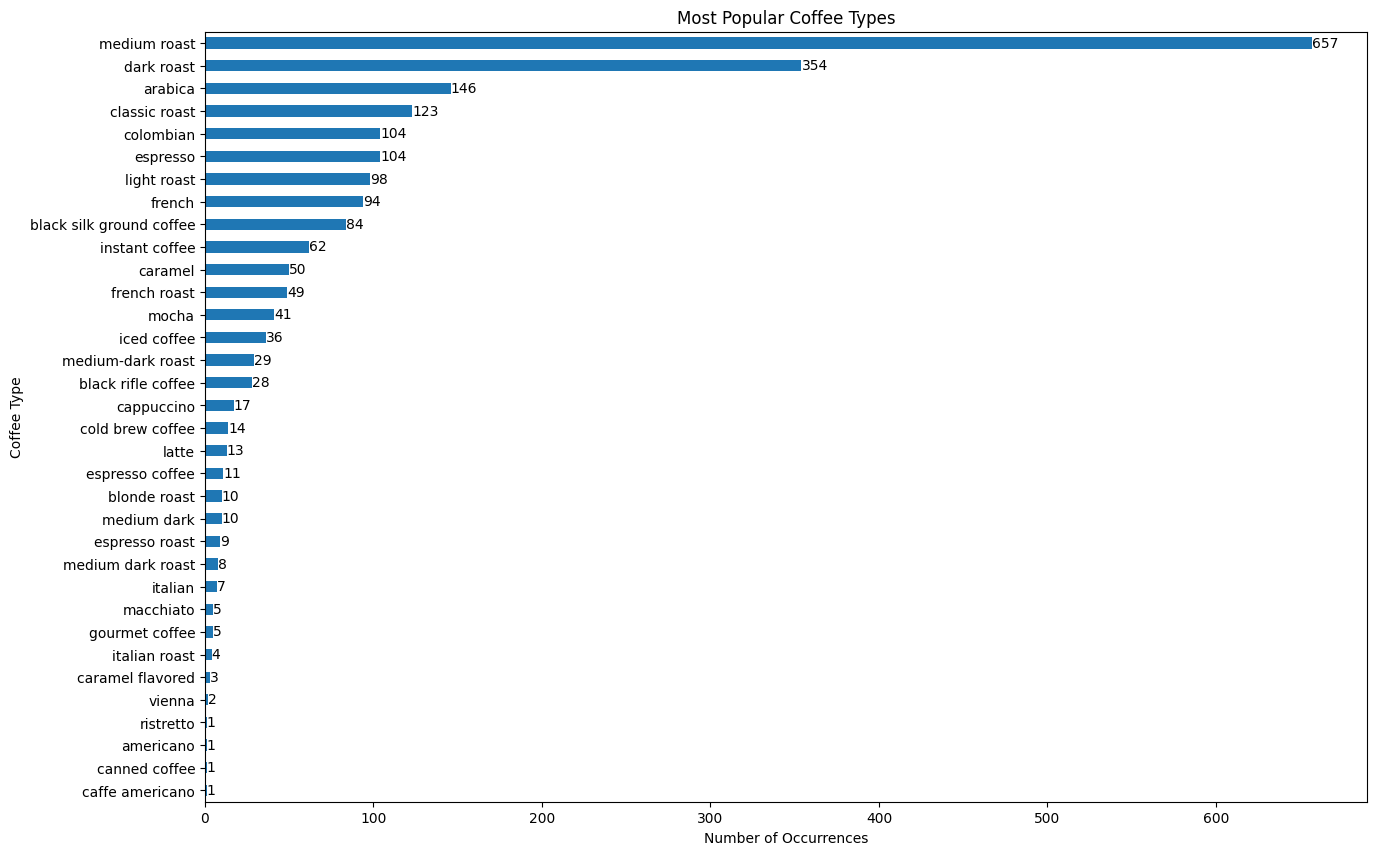

In [51]:
coffee_types_new_series = pd.Series(coffee_types_new).dropna()

plt.title('Most Popular Coffee Types')

ax = coffee_types_new_series.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(15,10))
ax.bar_label(ax.containers[0]) # bar annotation

plt.ylabel('Coffee Type')
plt.xlabel('Number of Occurrences')

plt.show()

Most frequent coffee weight? ✅ 

Answer: ~300-500 grams

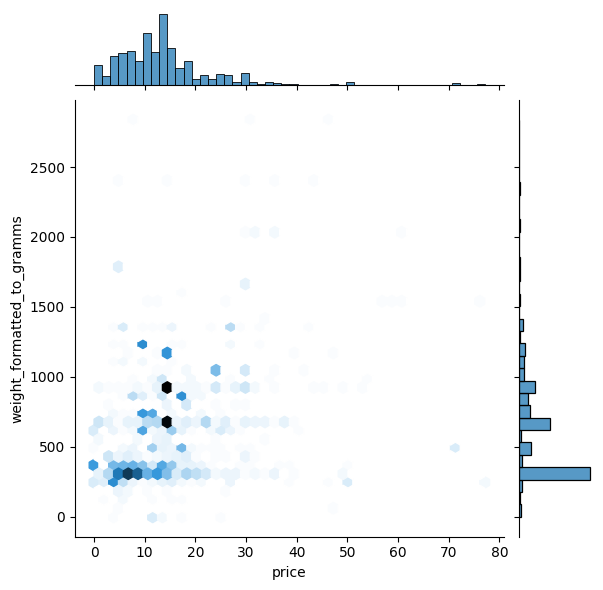

In [19]:
sns.jointplot(data=coffee_df, x='price', y='weight_formatted_to_gramms', kind='hex')

Additional Plots

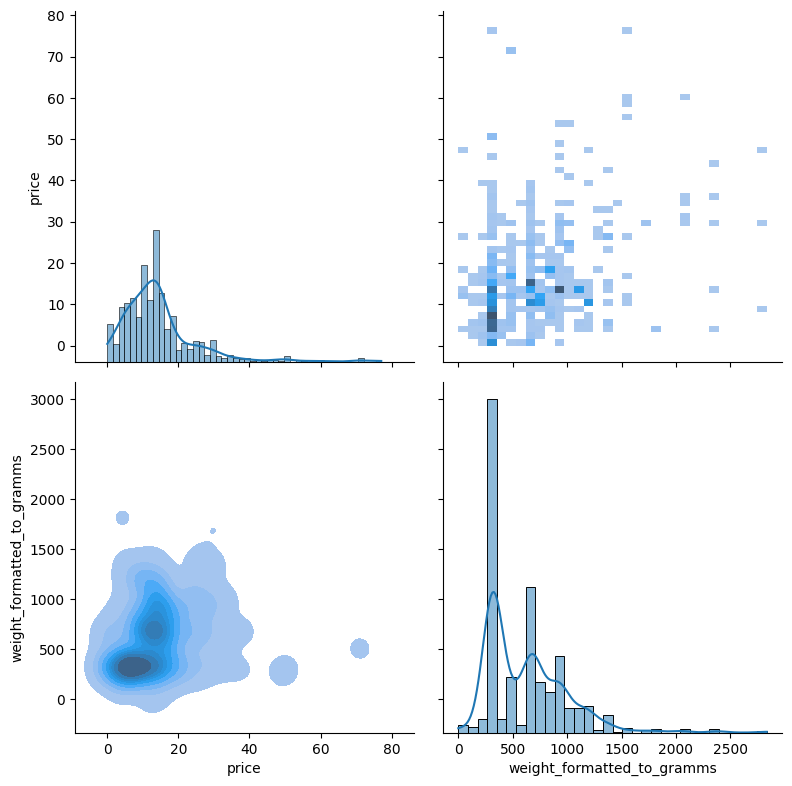

In [20]:
g = sns.PairGrid(coffee_df[['price', 'weight_formatted_to_gramms']], height=4)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

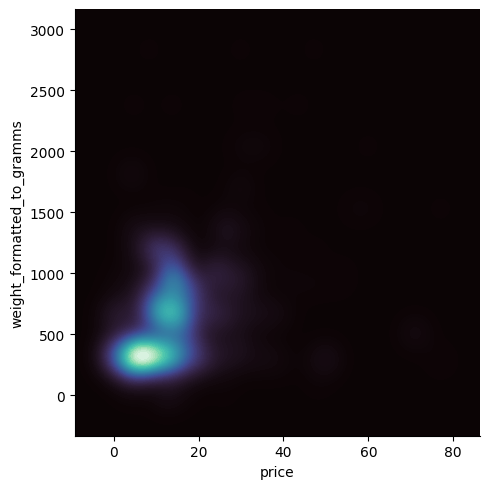

In [21]:
sns.displot(
    coffee_df,
    x='price',
    y='weight_formatted_to_gramms',
    kind='kde',
    fill=True,
    thresh=0,
    levels=100,
    cmap='mako',
)

Higher weight (gramms) = bigger price? ✅
- With this dataset it depends. 

Lower weight (gramms) = lower price? ✅
- With this dataset it depends.

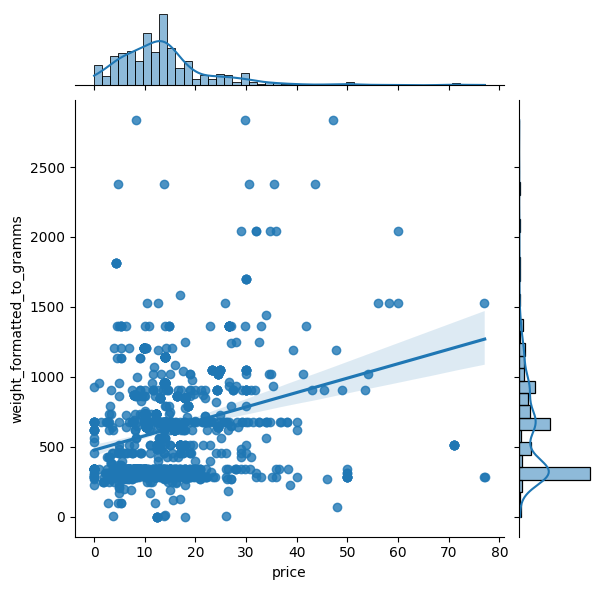

In [22]:
sns.jointplot(data=coffee_df, x='price', y='weight_formatted_to_gramms', kind='reg')

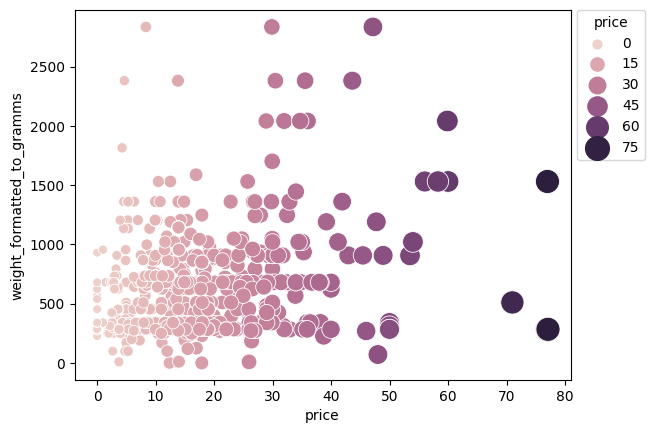

In [23]:
ax = sns.scatterplot(
    data=coffee_df,
    x='price',
    y='weight_formatted_to_gramms',
    hue='price',
    size='price',
    sizes=(40, 300),
)

# https://stackoverflow.com/a/34579525/15164646
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1.02)) # 1 = X axis, 1.02 = Y axis of the legend.